# XVIII. INTRODUCTION TO GREEDY ALGORITHMS 
Generally speaking, what a greedy algorithm does, is make a sequence of decisions with each decision being made myopically. That is, it seems like a good idea at the time and then you hope that everything works out at the end. 

So let me proceed by comparing it and contrasting it to the divide and conquer algorithms paradigm. 
- First, both a strength and a weakness of the greedy algorithm design paradigm is just how easy it is to apply. So it's often quite easy to come up with plausible greedy algorithms for a problem, even multiple difference plausible greedy algorithms. I think that a point of contrast with divide and conquer algorithms. Often it's tricky to come up with a plausible divide and conquer algorithm,and usually you have this eureka moment where you finally figure out how to decompose the problem in the right way. 
- Secondly, analyzing running time of greedy algorithms will generally be much easier than it was with divide and conquer algorithms. For divide and conquer algorithms it was really unclear whether they were fast or slow, because we had to understand the running time over multiple levels of recursion. On the one hand problems were size was getting smaller, but on the other hand, the number of some problems was proliferating. So we had to work hard, we developed these powerful tools like the master method, and some other techniques, for figuring out just how fast an algorithm like Merge Sort runs, or just how fast an algorithm like Strassen's fast matrix multiplication algorithm runs. In contrast with greedy algorithms, it will often be a one liner. Often it will be clear that the work is dominated by say, a sorting sub routine and of course we all know that sorting takes n log and time if you use a sensible algorithm for it. 
- Now the catch,and this is the third point of comparison, is we're generally going to have to work much harder to understand correctness issues of greedy algorithms. For divide-and-conquer algorithms we didn't talk much about correctness. It was generally a pretty straightforward induction proof. You can review the lectures on Quicksort if you want an example of one of those canonical inductive correctness proofs. But the game totally changes with greedy algorithms. In fact, given a greedy algorithm we often won't even have very good intuition for whether or not they are correct. Let alone how to prove they're correct. So even with a correct algorithm, it's often hard to figure out, why it's correct. And in fact, if you remember only one thing from all of this greedy algorithm discussion many years from now, I hope one key thing you remember is they're often not correct.


### Application: Dijkstra's algorithm
Now for a greedy algorithms remember what they do, they sequentially make a bunch of irrevocable decisions, so here the induction is going to be on decisions made by the algorithm. And if you go back to our proof ofcorrectness of Dijkstra's algorithm, that in fact is exactly how we proved Dijkstra's algorithm correct. It was by induction of the number of iterations, in each iteration of the main wild loop.Computed the shortest path to one new destination. And we always proof that assuming all of our previous computations were correct, that's the inductive hypothesis. Then so is the computation in the current iteration. And so then by induction, everything the algorithm ever does is correct. So that's a greedy proof by induction that a greedy algorithm can be correct. Some of the text books call this method of proof greedy stays ahead, meaning you always proof greedy's doing the right thing iteration by iteration. 

So a second approach to approving the correctness of greedy algorithms which works in a lot of cases is what's called an exchange argument. So you haven't yet seen any examples of exchange arguments in this class so I can't really tell you what they are but that's what we're going to proceed next. I'm going to argue by an exchange argument that a couple of difference famous greedy algorithms are in fact corrected. It has a couple of different flavors one flavor is to approach it by contradiction. You assume for contradiction that a greedy algorithm is incorrect and then you show that you can take an optimal solution and exchange two elements of that optimal solution and get something even better which of course contradicts the assumption that you started with an optimal solution. a different flavor would be to gradually exchange an optimal solution into the one output by a greedy algorithm without making the solution any worse. That would show that the output of the greedy algorithm is in fact optimal.

***
Approaches to prove correctness of Greeady Algorithms:
-  Greedy proof by Induction  / greedy stays ahead

-  Exchange Argument
     - Proof by Contradiction
     - Gradually exchange an optimal solution into the one output by a greedy algorithm without making the solution any worse.
***

### Application: Optimal Caching
A page request just means that the client wants to access something in memory and it's guaranteed to be in the big slow memory. But if its not already in the small fast memory then you got to bring it in, you got to put it in there for the subsequent access. The algorithmic aspect of the problem answers the picture when there is a cache miss or also known as a page fault. That is when there is a request for some data which is not already in the cache. When that is the case, you have to bring it into the cache. The design question then is what do you evict from the cache in order to make room for this new piece of data which you have to bring in?

What's the best algorithm? How do we minimize the number of cache misses, suffering only the ones that are inevitable?
So this question was given a very elegant answer by Belady back in the 1960's. And I'm going to state the answer as a theorem. And the natural greedy algorithm that is optimal, is called the furthest in the future algorithm. So what is the furthest in the future algorithm? Well, it's exactly what you think it would be. It's basically what seems like a good idea at the moment you have to perform a eviction from the cache. Basically you want to put off judgment day. You want to put off the regret of evicting this particular piece of data as long as possible. When are you going to regret evicting a piece of data? Well, it's when it gets requested next. So if we have four things in the cache, you know, one is one is requested next, one is requested in seven time steps and one is requested in you know, 70 timesteps, that's the one you want to evict now because it will take the longest until you actually regret that eviction. So for example, in the example on the previous slide, you can check that the furthest in the future algorithm would in fact evict the ones you want to evict, a and b, not the ones that we evicted in the example, c and d. Now at this point, many of you are probably justifiably scratching your heads. You're wondering, you know, why is this useful. It doesn't seem like this is what we wanted. The objection, to this result being that the furthest in the future algorithm is clairvoyant. Its very definition assumes that you know the future, it assumes that at the moment that you have to make an eviction you're aware of when each of the pieces data in the cache will be requested next. But if you think for a minute about the motivating applications for sudding theultimate caching problem, this assumption simply doesn't hold, you simply do not know the future, you simply do not know when each of the pieces of data in your cache will be requested next. So this algorithm is not defined, it is unimplementable. Despite that, this is still an extremelyuseful result to know. Why. Well, two reasons. First of all, this unimplementable algorithm can never the less, serve as a guide line for practical. Implementable algorithms. For example it naturally motivates the LRU or least recently used caching algorithm. So what you do in the LRU algorithm is that instead of looking forward in the future, which you can't do generally, you look in the past. And you say, well, let me guess that whatever's been requested recently, will be requested again soon. Whatever hasn't been request been requested for a long time, will continue to not be requested for a long time. So, that sets as a proxy for the piece of data that's going to be referenced the furthest down the future, you look for the one that was most recently referenced the furthest back in the past. So that's the LRU algorithm. And as long as data exhibits what's called locality of reference, meaning whatever's being requested a lot in the recent past is also going to be what's requested in the near future. Then LRU is going to approximate furthest in the future. And indeed, LRU is in many applications, the gold standard amongst practical implementable caching algorithms. The second reason this theorem is useful in practice is because it served as an idealized benchmark. A hypothetical perfect scenario against which you can compare your latest and greatest cashing hereistic. So for example, maybe you have a caching application and you start by implementing the LRU least recently used caching algorithm and then as a sanity check you probably want to go back later once you have hindsight you look at the last few days of traces of logs of page requests and you say, how well did we do. Let's look at how well our caching algorithm LRU did. And let's look at how well we would have done had we known the future. And hopefully, you're just a few percent away. And then you can conclude that, yes indeed, the data seem to have locality reference. Yes indeed, LRU is doing almost as well as if we know the future, and we can proceed. On the other hand, if you go back through the last few days of logs, and you find that your caching algorithm is doing much worse than furthest in the future, then it's back to the drawing board with respect to your caching algorithm. You should work harder, understand the data better, and come up with a smarter heuristic. 


# XIX. A SCHEDULING APPLICATION 
There's a lot of processes that have to be handled by this processor. In the algprithmic question, we are going to study, is, in what order should we sequence these jobs? 

Lets start with just, you know, what is the characteristics of jobs, what information do we have that might lead us to prefer one job over another. But for this problem, we're going to assume that each job comes with two known parameters. So, first of all, job $j$ has what we're going to call a weight $w_j$. That's a non-negative real number. And you should think of the weight of a job as quantifying its importance. That is, jobs with a higher weight, in some sense, deserve to be processed earlier than those with a lower weight. And secondly, each job $j$ is going to come with a non negative length $l_j$. Depending on the application, you may or may not have a good estimate of how long jobs are going to take, but for today to keep things simple, let's assume we know what the length of every job is, and that's $l_j$, it's part of the input to are problem. 

The completion time of a job  $C_j$ , is just the sum of the lengths of the jobs scheduled to before that job plus the length of that job itself.  So, that's the definition of job completion times. In some sense, we obviously want completion times to be as small as possible. But it's not so simple. In any given schedule, the jobs that aregive early on are going to have small completion times and the jobs towards the end are going to have big completion times. 

So inevitably, we're going be have to trading off the completion times between different jobs. So, what is the optimal way to so that? Well, that depends on our objectivefunction, and in scheduling, there's many different objective functions you might want to use. today, I'm just going to tell you about one. It's not the only natural objective function, but it's one of several most natural objective functions. It's called minimizing the weighted sum of completion times. 

    The objective Function :   Minimize the weighted sum of completion times  
    
<div align="center"> $\sum_{j = 1}^{n}w_j C_j$ </div>

And the algorithmic question we're going to study next, is how do we do this in general?Given arbitrary input in jobs, weights, and lengths, what is the sequence that minimizes this sum over all n factorial sequences you might consider?

### A Greedy Algorithm
We'll figure out how to narrow a couple of greedy algorithms down to just a single candidate. The computational problem and instant to specify by end jobs which come along with waits and links, and among all end factorial ways that we can sequence the jobs, we want to somehow home in on the one that minimizes the sum of waited completion times. So suppose all of the weights are different, and all of the lengths are different. If there's one job which is both higher weight, and smaller than another job, then clearly that job should go first. But what if our two rules of thumb to prefer high weight jobs and to prefer small jobs, give us conflicting advice. What if we have a pair of jobs, where one of them is on the one hand higher weight, higher priority but on the other hand, bigger than the other one. Which one should go first? Well let's again stay positive, and let's try to think about the simplest kind of algorithm that could conceivably work. So we have these two different parameters, length and weights. Maybe we can aggregate these two parameters into a single one, into a single sort of score for each of the jobs so that if we schedule the jobs from high score to low score, we'll always be optimal. So this idea leaves open the question of exactly how do we aggregate the length and the weight of a job into a single number. 

I'm just going to write down for concreteness two of what I think are of the simplest functions that have these properties. So one is going to be based on taking the difference of the two numbers and one isgoing to be based on taking the ratio of the two numbers.
1. weight minus length : this can be negative sometimes but that doesn't bother us the algorithm is still well defined
2. weight / length ratio :  increasing in weight, decreasing in length

At least one of them has to be wrong sometimes. So, as the algorithm designer, what the process now is. Maybe we can rule out at least one of these two proposed greedy algorithms, byshowing an example where it doesn't do the right thing. 

eg. So suppose I give you two jobs, the first one is both longer and more important than the other one, specifically, its length is five, its weight is three. The second job, its length is merely two but its weight is merely one. So what I want you to do is I want you to take our two proposed greedy algorithms, the first one which orders by difference, the second one which orders by ratio. I want you to execute them on this 2-job input and compute the sum of weighted completion times. And then answer what is the sum of weighted completion times of the corresponding two schedules.

$l_1$ = 5,  $l_2$ = 2 <br>
$w_1$ = 3,  $w_2$ = 1

what is the sum of weighted completion times of the corresponding two schedules ? :  23 and 22

So ordering by difference gives us a value of 23. Ordering by ratio gives a value of 22. So in this case the ratio does better than the difference. So certainly the difference is not optimal for this specific example. 

So what have we accomplished? Well, what we've done is we very quickly ruled out one of our natural proposed greedy algorithms. We know that ordering by difference is not always correct. Again, it's going to be correct in special cases like when all the lengths are equal, where all weights are equal but it is not correct in general. That said, please remember the warning I gave you in the high level discussion of greedy algorithms which is greedy algorithms are very often wrong. Just because we know algorithm number one is incorrect sometimes does not at all imply that algorithm number two is guaranteed to be correct. It's really easy to come up with multipleincorrect greedy algorithms for the same problem. It does, however, turn out. In this case for this greedy algorithm, algorithm number two driven by ratio it is happily always correct. 


***


##### Challenge Problem

In this programming problem and the next you'll code up the greedy algorithms for minimizing the weighted sum of completion times..

Download the text file below: jobs.txt

This file describes a set of jobs with positive and integral weights and lengths. It has the format

[number_of_jobs]

[job_1_weight] [job_1_length]

[job_2_weight] [job_2_length]

...

For example, the third line of the file is "74 59", indicating that the second job has weight 74 and length 59.

You should NOT assume that edge weights or lengths are distinct.

Your task in this problem is to run the greedy algorithm that schedules jobs in decreasing order of the difference (weight - length). Recall that this algorithm is not always optimal. IMPORTANT: if two jobs have equal difference (weight - length), you should schedule the job with higher weight first. Beware: if you break ties in a different way, you are likely to get the wrong answer. You should report the sum of weighted completion times of the resulting schedule --- a positive integer --- in the box below.

ADVICE: If you get the wrong answer, try out some small test cases to debug your algorithm (and post your test cases to the discussion forum).


In [47]:
import urllib3
http = urllib3.PoolManager()
r1 = http.request('GET', "https://d3c33hcgiwev3.cloudfront.net/_642c2ce8f3abe387bdff636d708cdb26_jobs.txt?Expires=1562630400&Signature=ecwadmZbqEHjv2luLg4k0elx~9esZMe9si0M5WODP5jQSO6d2PdBkxdg8BXkh-lRid3gxb2L5JkGaMIJufCmn2PkjotJPXeBnpTz3U0gokxU0cPcg9fVj~keT-EMSK7h5XQeemvyX8rxjl~b5jGGDqAI7pk-5a~S7tzTCxSVHfA_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A")
JobsStringList = r1.data.decode('utf8').split('\n')
JobsStringList = JobsStringList[:-1]
JobsIntegerList = []
for j in range(1, int(JobsStringList[0])+1):
    data = JobsStringList[j].split(' ')
    JobsIntegerList.append([None, int(data[0]), int(data[1]), None])
#print(JobsIntegerList)


/Users/aishwaya/anaconda2/envs/python_3_6/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [46]:
def schedules_jobs_difference(JobsIntegerList):
    for j in range(len(JobsIntegerList)):
        JobsIntegerList[j][0] = JobsIntegerList[j][1] - JobsIntegerList[j][2]
    JobsIntegerList = sorted(JobsIntegerList)
    JobsIntegerList.reverse()
    JobsIntegerList[0][3] = JobsIntegerList[0][2] 
    for j in range(1, len(JobsIntegerList)):
        JobsIntegerList[j][3] = JobsIntegerList[j-1][3] + JobsIntegerList[j][2] 
    min_objective_function = 0
    for j in range(len(JobsIntegerList)):
        min_objective_function += JobsIntegerList[j][1] * JobsIntegerList[j][3]
    print("The sum of weighted completion times of the resulting schedule : {}".format(min_objective_function))
       
        
#JobsIntegerList = [[None, 44, 25, None], [None, 60, 94, None], [None, 81, 10, None], [None, 36, 88, None], [None, 98, 25, None], [None, 99, 90, None]]
#JobsIntegerList = [[None, 5, 10, None], [None, 4, 5, None], [None, 3, 5, None], [None, 2, 2, None], [None, 1, 9, None]]
schedules_jobs_difference(JobsIntegerList)


The sum of weighted completion times of the resulting schedule : 69119377652


##### Challenge Problem

For this problem, use the same data set as in the previous problem.

Your task now is to run the greedy algorithm that schedules jobs (optimally) in decreasing order of the ratio (weight/length). In this algorithm, it does not matter how you break ties. You should report the sum of weighted completion times of the resulting schedule --- a positive integer --- in the box below.

In [48]:
def schedules_jobs_ratio(JobsIntegerList):
    for j in range(len(JobsIntegerList)):
        JobsIntegerList[j][0] = JobsIntegerList[j][1] / JobsIntegerList[j][2]
    JobsIntegerList = sorted(JobsIntegerList)
    JobsIntegerList.reverse()
    JobsIntegerList[0][3] = JobsIntegerList[0][2] 
    for j in range(1, len(JobsIntegerList)):
        JobsIntegerList[j][3] = JobsIntegerList[j-1][3] + JobsIntegerList[j][2] 
    min_objective_function = 0
    for j in range(len(JobsIntegerList)):
        min_objective_function += JobsIntegerList[j][1] * JobsIntegerList[j][3]
    print("The sum of weighted completion times of the resulting schedule : {}".format(min_objective_function))
       
        
#JobsIntegerList = [[None, 44, 25, None], [None, 60, 94, None], [None, 81, 10, None], [None, 36, 88, None], [None, 98, 25, None], [None, 99, 90, None]]
schedules_jobs_ratio(JobsIntegerList)



The sum of weighted completion times of the resulting schedule : 67311454237


# XX. PRIM'S MINIMUM SPANNING TREE ALGORITHM
The MST problem is a really fun playground for greedy algorithm design, because it's the singular problem in which pretty much any greedy algorithm you come up with seems to work.
Essentially, what we want do is connect a bunch of points together as cheaply as possible. And, as usual with an abstract problem the objects can mean something very literal. So maybe the points we're trying to connect are servers in some computer network, or it could represent something more abstract. Like maybe we have a model of documents like Web Pages where we represent them as points in space. And we want to somehow connect those together.

Prim's MST algorithm dates back over 50 years to 1957. in fact as you'll see Prim's algorithm shows a remarkable number of similarities with Dijkstra's shortest path algorithm. So you might not be surprised to know that Dijkstra also independently had discovered this algorithm a couple of years later (1959). But in fact it was only noticed much later that this exact same algorithm had been first discovered over 25 years earlier(1956) by a mathematician named Jarnick. For that reason you'll sometimes hear this called Jarnick's algorithm or the Prim-Jarnick algorithm. for gravity and to be consistent with some of the main text books in the area I'm just going to call this Prim's algorithm.<br>
The other algorithm we're going to cover which is also rightfully famous is Kruskal's MST algorithm. As far as I know this was indeed first discovered by Kruskal roughly the same time as Prim was doing his algorithm in the mid 50s. And in what sense do I say these algorithms are blazingly fast? Well, they run in almost linear time, linear in the number of edges of the graph. Specifically we'll see how using appropriate data structures will get each of them to run in time big $O(M log N)$, where M is the number of edges in the graph, and N is the number of vertices in the graph. We'll employ data structures to speed up Prim's algorithm in exactly the same way we did for Dijkstra's algorithm, that is we'll be using the heap data structure, One thing that's cool about Kruskal's algorithm is it'll give us an opportunity to study a new data structure, mainly the union fine data structure and that's a lot of fun to think about, in its own right.

Graphs can have an enormous number of spanning trees, an exponential number. So some of these algorithms are honing in really quickly on a needle in a haystack. I do want to emphasize for the MST problem we are be considering only undirected graphs. This is different notice, than when we discussed shortest-path problems in Part one of the course. There we worked with directed graphs. It's often called the optimal branching problem. And there are fast algorithms for it, but those algorithms are just slightly beyond the scope of this course. We're going to discuss only undirected graphs, and then minimum spanning trees for them. For the MST problem, we're going to assume that the graph is given as an adjacency list. That means, we're given an array of vertices, an array of edges. And we have pointers, wiring vertices to their incident edges and wiring edges back to their two endpoints.

    The MST of a graph has no cycles (i.e. there's no loops) and it spans all of the vertices.
 
#### Minimum spanning tree algorithm namely Prim's algorithm: 
The plan is to grow a tree one edge at a time. And we're going to keep growing this tree like a mold. We're going to start from just a seed vertex. And then we're going to suck up one newvertex with each iteration of the algorithm. So, this is similar to Dijkstra's Algorithm. In Dijkstra's Algorithm, it was clear where we should grow the initial mold from, because we were given a source vertex, that they're trying to compute the shortest paths out of. We have no source vertex in the minimum spanning tree problem, but it turns out that we can just pick an arbitrary vertexto start. Doesn't matter which one, which is cool. So the plan is in E generation we're going to add one edge and span one new vertex adjacent to the ones we're already spanning. Now as a greedy algorithm Prim is simply going to select the cheapest edge that allows it to span one additional new vertex. 

So here is Prim's minimum spanning tree algorithm. We're going to start with just two lines of initialization. We're going to maintain a set of vertices, capital X. This is meant to the be the vertices that we span so far. Again, we need some seed vertex from which to start the process. It doesn't matter where, which one we pick. We're going to get the same tree no matter what, so just call it little s. That's an arbitrary vertex from which we start growth. The other thing we're maintaining is, of course, the tree. So that's initially going to be empty. We're going to add one edge to it in each iteration. An invarient that we are going to maintain throughout the algorithm is that the edges that currently reside in the set capital T span the verticies that currently reside in the set capital X. Then we're going to have our main while loop. this is the workhorse of the algorithm. And it's very similar to the one inDijkstra's algorithm. Namely, each iteration is responsible for picking one edge crossing the current frontier. advancing to include one new vertex. And again, it's going to be greed. The criterion's going to be different, in fact, simpler, than with Dijkstra's Algorithm instead of looking at links. We're just going to say, what's the cheapest edge that allows us to span a new vertex? So the loop's going to keep going, as long as there are vertices that we don't yet span. And then what we do is we search to the edges that allow us to span a new vertex. So which edges are those?Well we want there to be one endpoint in the set X of vertices we already have our tree spanning and we want the other end point to be non-redundant, so we want it to be outside of X. So if we have an edge that crosses the frontier in this sense, one endpoint in X, in endpoint outside that's how we increase the number of spanned vertices by one in an iteration. So if E is the cheapest edge amongst all of those that cross the front here with one end point on either side, that's the one we're going to add to our tree so far capital T in this iteration, it's end point that's not already in capital X, that's going to be the very text that we add to X in this iteration. 

***
    
    Running time of Prim's algorithm : O(m n)
    Running time of Prim's algorithm using Heaps : O(m log n)


***

#### Prim's Minimum Spanning Tree Algorithm

Printing mst edges: [['s', 'g', 4], ['g', 'b', 1], ['b', 'f', 1], ['f', 'a', 1], ['f', 'h', 1], ['f', 't', 2], ['t', 'i', 1], ['b', 'c', 3], ['s', 'd', 8], ['d', 'e', 9]]
Overall cost of a minimum spanning tree: 31


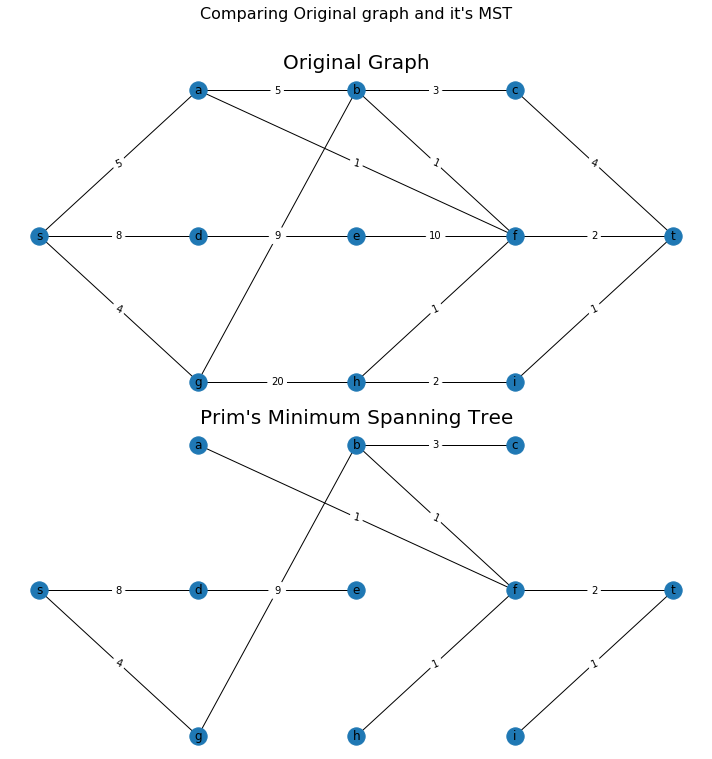

In [61]:
%matplotlib inline
import networkx as nx
import heapq
import numpy as np
from matplotlib import pyplot as plt

def prim_mst_undirected_naive(DG, source):
    X = [source]
    A = {}
    A[source] = 0
    mst_edges = []
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    v_overall = float('inf')
    overall_cost_mst = 0
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                edge_tail = edge[0]
                edge_head = edge[1]
            elif (edge[1] in X) and (edge[0] not in X):
                edge_tail = edge[1]
                edge_head = edge[0]
            if ((edge_tail in X) and (edge_head not in X)) :
                dji_greedy = DG.edges[edge_tail, edge_head]['weight'] #prim's greedy criterion
                if edge_head not in A:
                    A[edge_head] = dji_greedy
                elif dji_greedy < A[edge_head]:
                    A[edge_head] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    w_overall = edge_head  
                    v_overall = edge_tail
        mst_edges.append([v_overall, w_overall, minimum_2nd_overall])
        overall_cost_mst += minimum_2nd_overall
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
    print("Printing mst edges: {}\nOverall cost of a minimum spanning tree: {}".format(mst_edges, overall_cost_mst))
    
    return mst_edges
  
    
g = nx.Graph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (5, 10))
g.add_node('b', pos = (10, 10))
g.add_node('c', pos = (15, 10))
g.add_node('d', pos = (5, 5))
g.add_node('e', pos = (10, 5))
g.add_node('f', pos = (15, 5))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('i', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 'a', weight = 5)
g.add_edge('a', 'b', weight = 5)
g.add_edge('b', 'c', weight = 3)
g.add_edge('c', 't', weight = 4)
g.add_edge('s', 'd', weight = 8)
g.add_edge('d', 'e', weight = 9)
g.add_edge('e', 'f', weight = 10)
g.add_edge('f', 't', weight = 2)
g.add_edge('s', 'g', weight = 4)
g.add_edge('g', 'h', weight = 20)
g.add_edge('h', 'i', weight = 2)
g.add_edge('i', 't', weight = 1)
g.add_edge('a', 'f', weight = 1)
g.add_edge('b', 'f', weight = 1)
g.add_edge('b', 'g', weight = 1)
g.add_edge('h', 'f', weight = 1)
g.add_edge('i', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
plt.figure(figsize=(10,10))
plt.subplot(211)
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)
plt.title('Original Graph', size=20)



start_vert = 's'
mst_edges = prim_mst_undirected_naive(g, start_vert)
mst = nx.Graph()
mst.add_weighted_edges_from(mst_edges)
weights = nx.get_edge_attributes(mst, 'weight')
plt.subplot(212) 
nx.draw_networkx_edge_labels(mst, pos, edge_labels = weights)
nx.draw(mst, pos, with_labels = True)
plt.title('Prim\'s Minimum Spanning Tree', size=20)


plt.suptitle('Comparing Original graph and it\'s MST', size=16).set_position([.5, 1.05])
plt.tight_layout()
plt.show()


#### Fast Implementation :  Speed up via Heaps
Running time of Prim's algorithm : $O(m n)$

Over and over again, we keep meaning to do a minimum computation amongst all edges crossing the frontier, we need to find the cheapest one.So, the question we should ask ourselves is what kind of data structure would facilitate, would speed-up repeated minimum computations. And if you recall from part 1, we have a data structure where that's exactly what it's raison d'etre is, the heap, the meaning of life for a heap is to speed-up repeated minimum computations, just like in Prim's algorithm. We're just going to make use of these operations and the fact that they run in logarithmic time. 

Now, what do you do when you want to extract the minimum? So you rip off the root of this tree,and now, you have to rearrange the tree to restore the heap property. So you swap the last leaf up to where the root was, you bubble-down as needed to restore the heap property. how do you insert? You put the new object as the new last leaf and you bubble it up as needed to restore the heap property. To delete from the middle of a heap, you just sort of rip it out and then bubble things up or down as necessary to restore the heap property. 

So our intuition is that because we're doing repeated minimum computations in Prim's algorithm, each time that it's while-looped, compute the cheapest edge cross in your frontier, that's sort of in the wheelhouse of heaps. So how should we use heaps? Well, the first idea, which is a pretty good idea, is to use the heap to store edges, right? Because our minimum computation should result in us choosing an edge, so when we EXTRACT-MIN from a heap, we want it to hand us an edge on a silver platter.

The next vertex that we should add to X in this iteration. And moreover, the cheapest edge incident to that vertex crossing the frontier is the one that we should be adding to the set T in this iteration. And the way to think about this fact is to think of us as essentially simulating the brute-force search and the naive implementation using a 2-round knockout tournament. So, in the straightforward implementation of Prim, the way we think of it is we just do a scan through all the edges crossing the frontier and we remember the winner, weremember the smallest cost of them all. Here, with a heap, we're doing it in two steps. So first of all, for each vertex on the right-hand side of the cut, for each vertex in v - x, it locally rememberswhat is its best candidate so what is the cheapest edge incident on that vertex crossing the frontier. So that's kind of round one, so for an edge to be chosen as the winner, at the very least, it'd better be a local winner. It'd better be the cheapest edge crossing the cut that ends at this particular vertex on the right-hand side of the cut. So that's just in a definition of the key of each vertex and encodes the value of the winner localed in that vertex. And then this EXTRACT-MIN is envoking the second round of this 2, 2-round elimination tournament. It's saying, well, amongst all the proposals from the 1st round, amongst all the crossing edges that are locally minimum given it's endpoint, which of them is the cheapest overall? And that's going to be the cheapest edge crossing this cut, the result of this exact min computation.


Running time of Prim's algorithm using **Heaps** : $O(m \log n)$

*** 

### Prim's Minimum Spanning Tree Algorithm - Heap implementation

Printing mst edges: [['a', 'f', 1], ['b', 'g', 1], ['c', 'b', 3], ['d', 's', 8], ['e', 'd', 9], ['f', 'b', 1], ['g', 's', 4], ['h', 'f', 1], ['i', 'h', 2], ['t', 'i', 1]]
Overall cost of a minimum spanning tree: 31


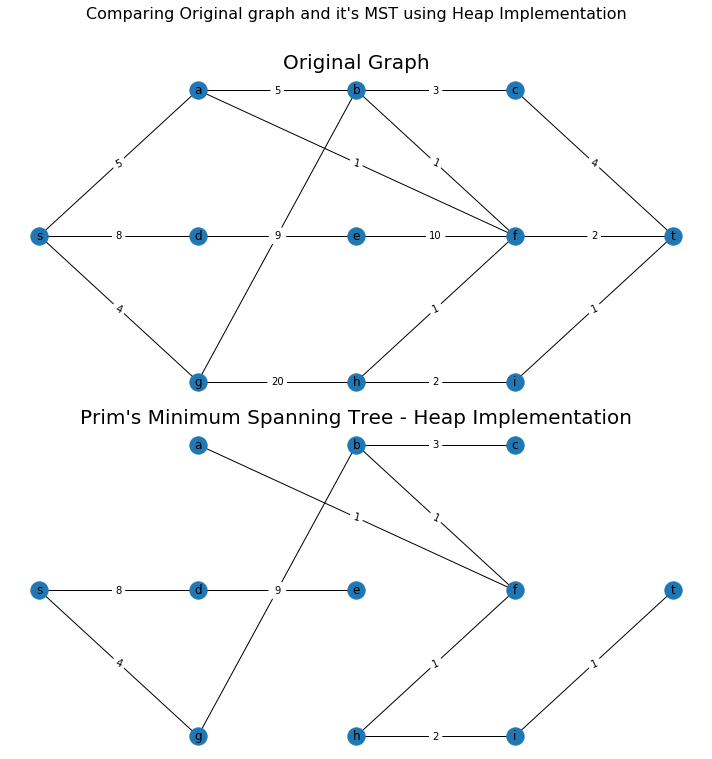

In [62]:
%matplotlib inline
import networkx as nx
import heapq
import numpy as np

def prim_mst_undirected_heap(DG, source):
    X = [source]
    minHeap = []
    mst_edges = []
    overall_cost_mst = 0
    heapq.heappush(minHeap, [0, source, source])
    all_nodes = list(DG.nodes)
    for node in all_nodes:
        DG.nodes[node]['shortest_dist'] = float('inf')
        DG.nodes[node]['last_node'] = None
    #print("Heap:")
    while len(minHeap) != 0:
        w = heapq.heappop(minHeap)
        #print(minHeap)
        X.append(w[1])
        DG.nodes[w[1]]['shortest_dist'] = w[0]
        if w[1] != source:
            DG.nodes[w[1]]['last_node'] = w[2]
        for edge in list(DG.edges):
            if (edge[0] == w[1]) and (edge[1] not in X):
                edge_tail = edge[0]
                edge_head = edge[1]
            elif (edge[1] == w[1]) and (edge[0] not in X):
                edge_tail = edge[1]
                edge_head = edge[0]
            else:
                continue
            if ((edge_tail == w[1]) and (edge_head not in X)) : # node that has just been popped should be the tail
                dji_greedy = DG.edges[edge_tail, edge_head]['weight']  #prim's greedy criterion
                if len(minHeap) == 0:
                    heapq.heappush(minHeap, [dji_greedy, edge_head, edge_tail])
                    #print("Edge: {} updated with dist: {}".format(edge_head, dji_greedy))
                    continue
                singlenp = [i[1] for i in minHeap]
                if edge_head not in singlenp:
                    heapq.heappush(minHeap, [dji_greedy, edge_head, edge_tail])
                    #print("Edge: {} updated with dist: {}".format(edge_head, dji_greedy))
                else:
                    dest_idx = singlenp.index(edge_head)
                    if dji_greedy < minHeap[dest_idx][0]:
                        #print(minHeap)
                        minHeap[dest_idx] = minHeap[0]
                        heapq.heapify(minHeap)
                        #print(minHeap)
                        heapq.heappop(minHeap)
                        #print(minHeap)
                        heapq.heappush(minHeap, [dji_greedy, edge_head, edge_tail])
                        #print(minHeap)
                        #print("Edge: {} updated with dist: {}".format(edge_head, dji_greedy))
    #print("Printing minimum distances from starting vertex \'{}\'".format(source))
    for node in all_nodes:
        if node != source:
            mst_edges.append([node, DG.nodes[node]['last_node'], DG.nodes[node]['shortest_dist']])
            overall_cost_mst += DG.nodes[node]['shortest_dist']
    print("Printing mst edges: {}\nOverall cost of a minimum spanning tree: {}".format(mst_edges, overall_cost_mst)) 
    return mst_edges






g = nx.Graph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (5, 10))
g.add_node('b', pos = (10, 10))
g.add_node('c', pos = (15, 10))
g.add_node('d', pos = (5, 5))
g.add_node('e', pos = (10, 5))
g.add_node('f', pos = (15, 5))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('i', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 'a', weight = 5)
g.add_edge('a', 'b', weight = 5)
g.add_edge('b', 'c', weight = 3)
g.add_edge('c', 't', weight = 4)
g.add_edge('s', 'd', weight = 8)
g.add_edge('d', 'e', weight = 9)
g.add_edge('e', 'f', weight = 10)
g.add_edge('f', 't', weight = 2)
g.add_edge('s', 'g', weight = 4)
g.add_edge('g', 'h', weight = 20)
g.add_edge('h', 'i', weight = 2)
g.add_edge('i', 't', weight = 1)
g.add_edge('a', 'f', weight = 1)
g.add_edge('b', 'f', weight = 1)
g.add_edge('b', 'g', weight = 1)
g.add_edge('h', 'f', weight = 1)
g.add_edge('i', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
plt.figure(figsize=(10,10))
plt.subplot(211)
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)
plt.title('Original Graph', size=20)



start_vert = 's'
mst_edges = prim_mst_undirected_heap(g, start_vert)
mst = nx.Graph()
mst.add_weighted_edges_from(mst_edges)
weights = nx.get_edge_attributes(mst, 'weight')
plt.subplot(212) 
nx.draw_networkx_edge_labels(mst, pos, edge_labels = weights)
nx.draw(mst, pos, with_labels = True)
plt.title('Prim\'s Minimum Spanning Tree - Heap Implementation', size=20)


plt.suptitle('Comparing Original graph and it\'s MST using Heap Implementation', size=16).set_position([.5, 1.05])
plt.tight_layout()
plt.show()

##### Challenge Problem


In this programming problem you'll code up Prim's minimum spanning tree algorithm.

Download the text file below : edges.txt

This file describes an undirected graph with integer edge costs. It has the format

[number_of_nodes] [number_of_edges]

[one_node_of_edge_1] [other_node_of_edge_1] [edge_1_cost]

[one_node_of_edge_2] [other_node_of_edge_2] [edge_2_cost]

...

For example, the third line of the file is "2 3 -8874", indicating that there is an edge connecting vertex #2 and vertex #3 that has cost -8874.

You should NOT assume that edge costs are positive, nor should you assume that they are distinct.

Your task is to run Prim's minimum spanning tree algorithm on this graph. You should report the overall cost of a minimum spanning tree --- an integer, which may or may not be negative --- in the box below.

IMPLEMENTATION NOTES: This graph is small enough that the straightforward O(mn) time implementation of Prim's algorithm should work fine. OPTIONAL: For those of you seeking an additional challenge, try implementing a heap-based version. The simpler approach, which should already give you a healthy speed-up, is to maintain relevant edges in a heap (with keys = edge costs). The superior approach stores the unprocessed vertices in the heap. Note this requires a heap that supports deletions, and you'll probably need to maintain some kind of mapping between vertices and their positions in the heap.

##### Prim's Minimum Spanning Tree Algorithm - Naive implementation on Challenge dataset

/Users/aishwaya/anaconda2/envs/python_3_6/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Printing mst edges: [[1, 397, -5942], [397, 228, -7927], [228, 386, -9013], [397, 343, -7570], [343, 293, -8657], [397, 159, -7157], [159, 335, -8205], [159, 160, -7839], [335, 19, -7787], [19, 328, -8231], [343, 488, -6842], [488, 167, -9090], [167, 312, -6573], [312, 474, -8920], [474, 368, -7991], [368, 369, -8888], [368, 98, -7792], [474, 475, -7052], [475, 464, -9291], [464, 267, -7760], [267, 260, -9134], [267, 268, -8907], [267, 63, -8209], [63, 62, -9504], [267, 408, -7695], [260, 479, -7629], [62, 173, -7617], [173, 172, -9697], [172, 211, -8557], [173, 428, -8093], [428, 179, -8340], [173, 2, -7751], [2, 3, -8874], [3, 144, -9056], [3, 91, -8754], [2, 104, -8744], [104, 223, -7868], [211, 443, -7502], [443, 444, -8151], [443, 442, -7558], [442, 441, -9851], [442, 384, -9312], [442, 454, -7877], [454, 103, -9992], [103, 221, -9998], [454, 366, -9405], [366, 432, -9909], [366, 285, -9502], [454, 489, -9298], [489, 360, -9515], [489, 490, -9312], [366, 365, -9219], [365, 15, -93

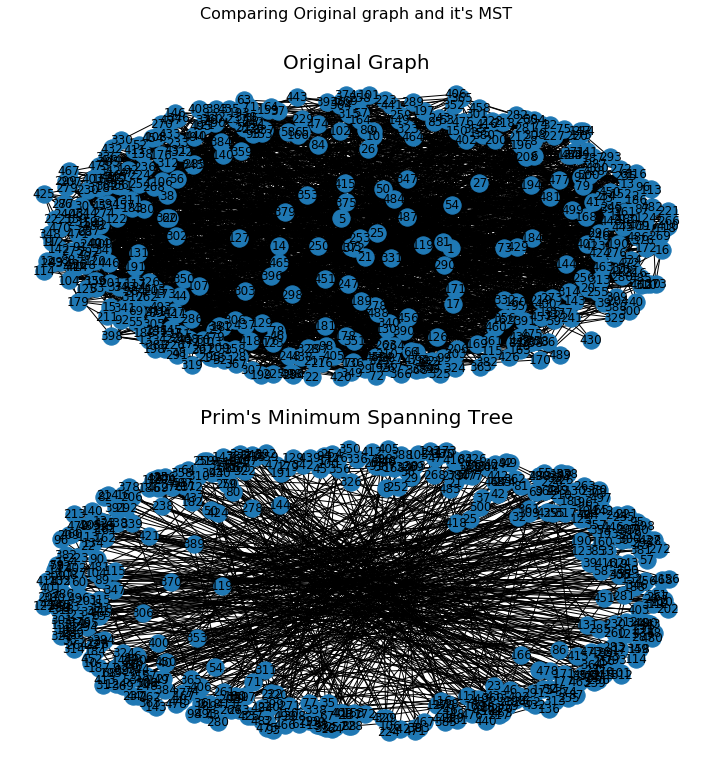

In [35]:
import urllib3

def testcase():
    challenge_graph = nx.Graph()
    http = urllib3.PoolManager()
    r1 = http.request('GET', "https://d3c33hcgiwev3.cloudfront.net/_d4f3531eac1d289525141e95a2fea52f_edges.txt?Expires=1562630400&Signature=OZ1W981H1~4N~P0~IJOt6N55YODCgLhdMObTVR5hMCgrcMiI8l7Cg54Pz4FGRYPrVEmrZHXj5vJyPUkNDiba5sCueqpbKWWlRUAFi7OnMysreG7JkDy41yq4~fVTD3pt8RTedeMHfrF6kGk-fROZD2-S-d7hSmklJQ-s-wh8DxY_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A")
    IntegerMatrixStringJoin = r1.data.decode('utf8').split('\n')
    IntegerMatrixStringJoin.remove('')
    challenge_graph = nx.Graph()
    edges = []
    idx0 = 0
    for i in IntegerMatrixStringJoin:
        if idx0 == 0:
            idx0 = 1
            continue
        node_edges = i.split(' ')
        edges.append((int(node_edges[0]), int(node_edges[1]), int(node_edges[2])))
    challenge_graph.add_weighted_edges_from(edges)
    #nx.draw(challenge_graph, with_labels = True)
    return challenge_graph


challenge_graph = testcase()

plt.figure(figsize=(10,10))
plt.subplot(211)
nx.draw(challenge_graph, with_labels = True)
plt.title('Original Graph', size=20)



start_vert = 1
mst_edges = mst_undirected_djikstra_naive(challenge_graph, start_vert)
mst = nx.Graph()
mst.add_weighted_edges_from(mst_edges)
#weights = nx.get_edge_attributes(mst, 'weight')
plt.subplot(212) 
#nx.draw_networkx_edge_labels(mst, pos, edge_labels = weights)
nx.draw(mst, with_labels = True)
plt.title('Prim\'s Minimum Spanning Tree', size=20)


plt.suptitle('Comparing Original graph and it\'s MST', size=16).set_position([.5, 1.05])
plt.tight_layout()
plt.show()

##### Prim's Minimum Spanning Tree Algorithm - Heap implementation on Challenge dataset

Printing mst edges: [[2, 173, -7751], [3, 2, -8874], [4, 82, -6069], [5, 122, 722], [6, 297, -3253], [7, 8, -7507], [8, 124, -5969], [9, 307, -4003], [10, 9, -5012], [11, 176, -9470], [12, 11, -6736], [13, 12, -7604], [14, 219, -9493], [15, 365, -9352], [16, 15, -7753], [17, 16, -4370], [18, 433, -9810], [19, 335, -7787], [20, 115, -7690], [21, 352, 1462], [22, 63, -7119], [23, 198, 3114], [24, 13, -9600], [25, 288, -3078], [26, 366, -7642], [27, 28, -6775], [28, 458, -9550], [29, 61, -9929], [30, 31, -9951], [31, 156, -9373], [32, 31, -8643], [33, 301, -7033], [34, 169, -9727], [35, 225, -9215], [36, 497, -5712], [37, 36, -7609], [38, 388, -7439], [39, 122, -6276], [40, 81, -5474], [41, 183, -9848], [42, 43, -4823], [43, 44, -6198], [44, 197, -7215], [45, 202, -8727], [46, 259, -6561], [47, 46, -6059], [48, 380, -8760], [49, 95, -3905], [50, 228, -4294], [51, 327, -9020], [52, 238, -8566], [53, 70, -5040], [54, 55, -1572], [55, 111, -3854], [56, 475, -6542], [57, 258, -5160], [58, 333

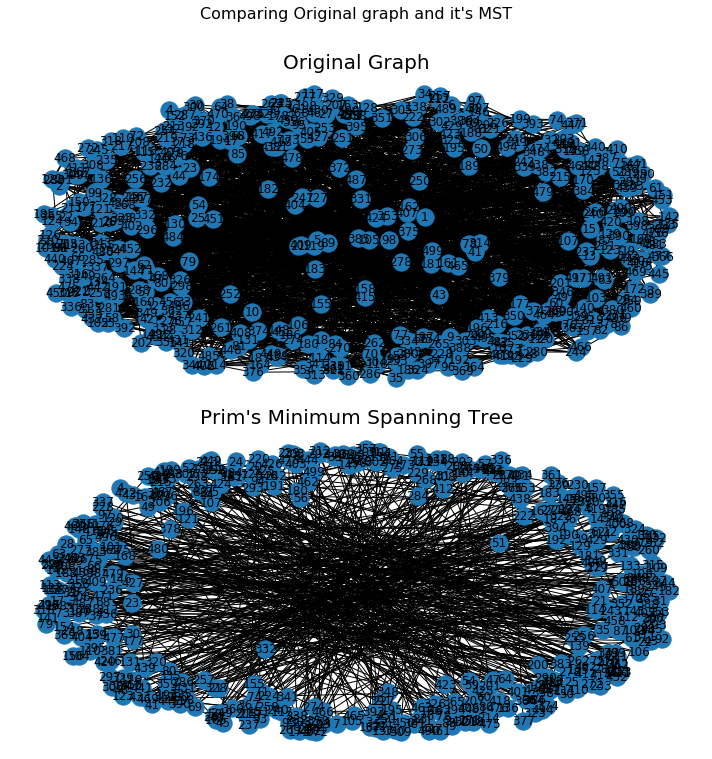

In [58]:

plt.figure(figsize=(10,10))
plt.subplot(211)
nx.draw(challenge_graph, with_labels = True)
plt.title('Original Graph', size=20)



start_vert = 1
mst_edges = mst_undirected_djikstra_heap(challenge_graph, start_vert)
mst = nx.Graph()
mst.add_weighted_edges_from(mst_edges)
#weights = nx.get_edge_attributes(mst, 'weight')
plt.subplot(212) 
#nx.draw_networkx_edge_labels(mst, pos, edge_labels = weights)
nx.draw(mst, with_labels = True)
plt.title('Prim\'s Minimum Spanning Tree', size=20)


plt.suptitle('Comparing Original graph and it\'s MST', size=16).set_position([.5, 1.05])
plt.tight_layout()
plt.show()